In [1]:
!pip install tensorflow keras matplotlib numpy


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 4.8 MB/s eta 0:01:09
   ---------------------------------------- 2.1/331.9 MB 5.9 MB/s eta 0:00:57
    --------------------------------------- 4.5/331.9 MB 7.3 MB/s eta 0:00:46
    --------------------------------------- 7.9/331.9 MB 9.5 MB/s eta 0:00:34
   - -------------------------------------- 11.8/331.9 MB 11.2 MB/s eta 0:00:29
   - -------------------------------------- 16.5/331.9 MB 13.0 MB/s eta 0:00:25
   -- ------------------------------------- 22.5/331.9 MB 15.2 MB/s eta 0:00:21
   --- ------------------------------------ 29.1/331.9 MB 17.1 MB/s eta 0:00:18
   ---- ----------------------------------- 36.2/331.9 MB 18.8 MB/s eta 0:00:16
   ----- ---------------------------------- 44.0/331.9 MB 20.6 MB/s eta 0:00:14
   ------ --------------------------------- 52.7/331.9 MB 22.5 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 12.0.0 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [3]:
!pip install tensorflow keras matplotlib numpy scikit-learn


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os


In [11]:
import os, shutil, random
from sklearn.model_selection import train_test_split
import pathlib

# Your main dataset directory (where all class folders are)
base_dir = r"C:\Users\Lenovo\OneDrive\Documents\animal_classification\Animal Classification\dataset"

# New directories for split data
train_dir = r"C:\Users\Lenovo\OneDrive\Documents\animal_classification\Animal Classification\dataset_split\train"
val_dir   = r"C:\Users\Lenovo\OneDrive\Documents\animal_classification\Animal Classification\dataset_split\val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Go through each class (animal) folder
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
        
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        
        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(train_dir, class_name, img))
        for img in val_imgs:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(val_dir, class_name, img))

print("✅ Dataset split into train/val successfully!")


✅ Dataset split into train/val successfully!


In [13]:
train_dir = r"C:\Users\Lenovo\OneDrive\Documents\animal_classification\Animal Classification\dataset_split\train"
val_dir = r"C:\Users\Lenovo\OneDrive\Documents\animal_classification\Animal Classification\dataset_split\val"


In [15]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1549 images belonging to 15 classes.
Found 395 images belonging to 15 classes.


In [17]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,567,951 (105.16 MB)

 Trainable params: 12,853,263 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 904s 18s/step - accuracy: 0.2059 - loss: 2.5603 - val_accuracy: 0.4987 - val_loss: 1.8999
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 558s 11s/step - accuracy: 0.4364 - loss: 1.8596 - val_accuracy: 0.6684 - val_loss: 1.4127
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 380s 8s/step - accuracy: 0.5165 - loss: 1.5553 - val_accuracy: 0.6709 - val_loss: 1.1977
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 397s 8s/step - accuracy: 0.5997 - loss: 1.3033 - val_accuracy: 0.7063 - val_loss: 1.0844
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.6591 - loss: 1.1685 - val_accuracy: 0.7367 - val_loss: 0.9707
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 384s 8s/step - accuracy: 0.6759 - loss: 1.0880 - val_accuracy: 0.7797 - val_loss: 0.8849
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.7030 - loss: 0.9891 - val_accuracy: 0.7646 - val_loss: 0.8417
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 363s 7s/step - accuracy: 0.7166 - loss: 0.9440 - val_accuracy: 0.7949 -

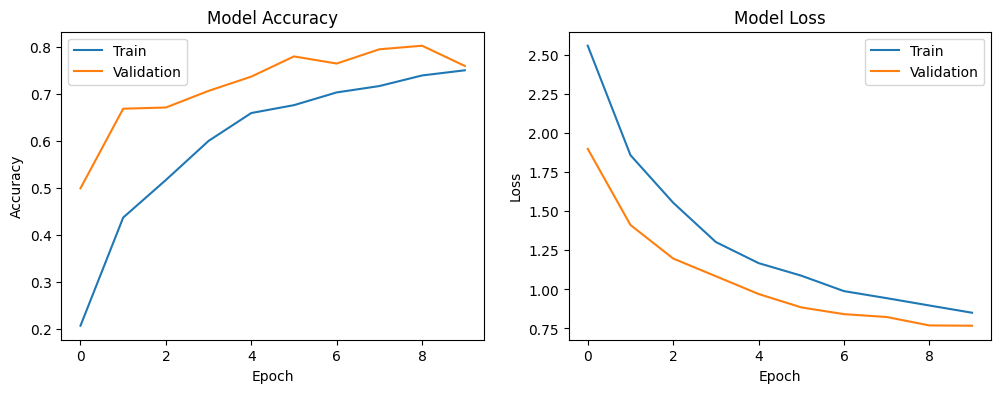

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


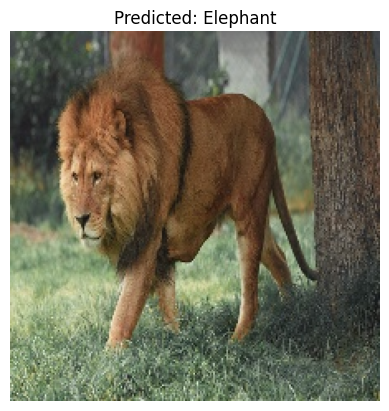

In [29]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [25]:
model.save('animal_classifier_vgg16.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


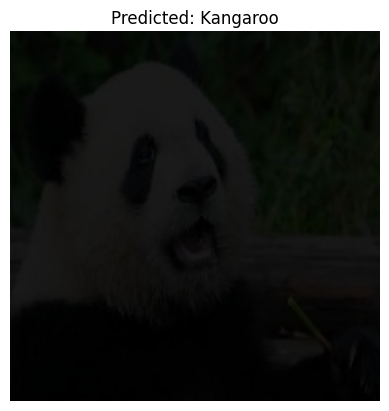

In [31]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


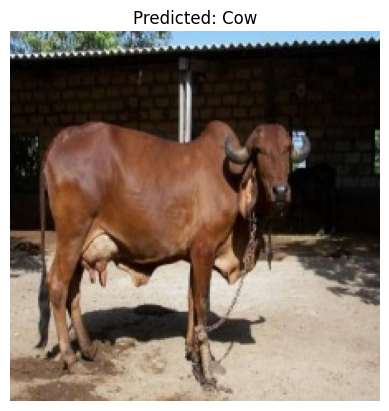

In [33]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


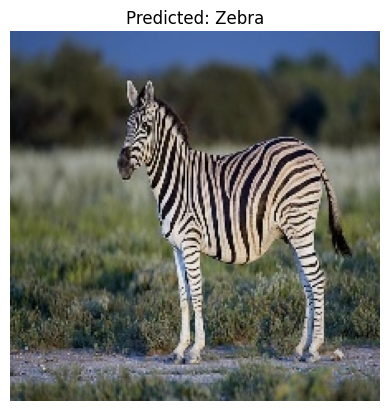

In [35]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


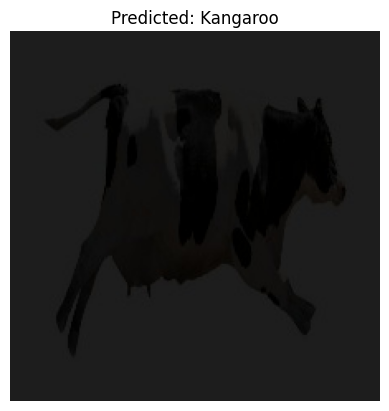

In [37]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


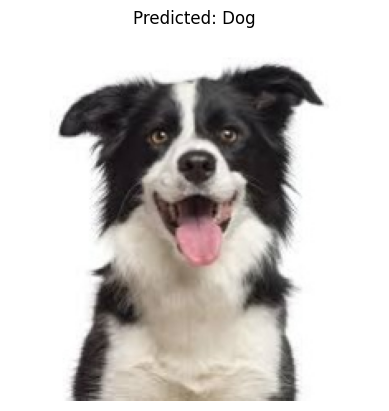

In [39]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


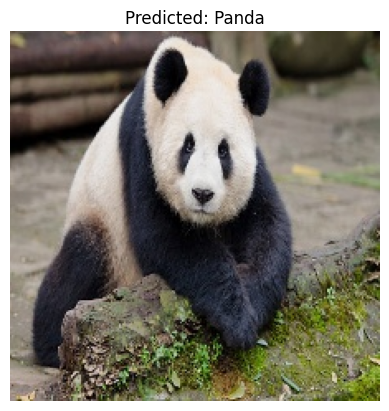

In [41]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


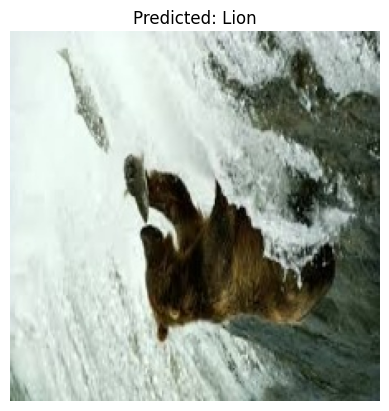

In [43]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


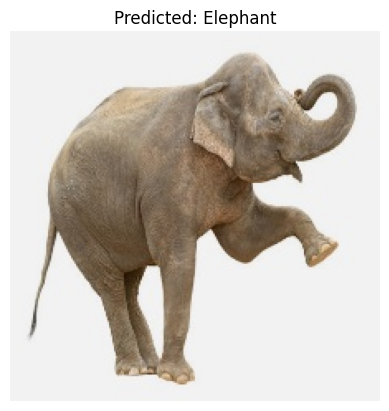

In [45]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


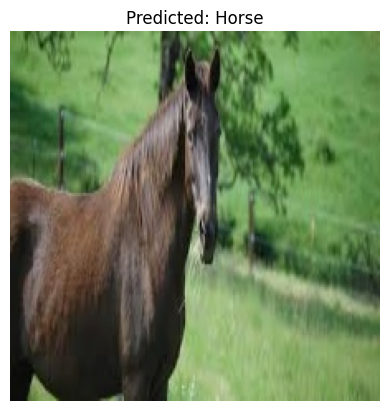

In [47]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


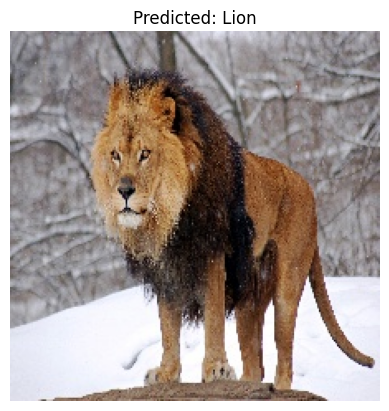

In [49]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


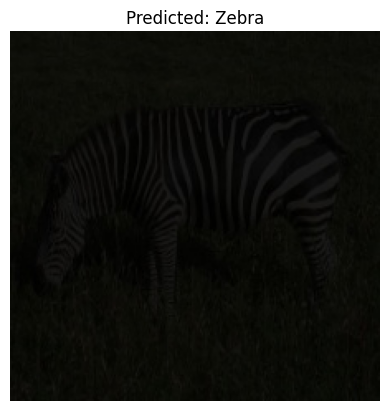

In [53]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


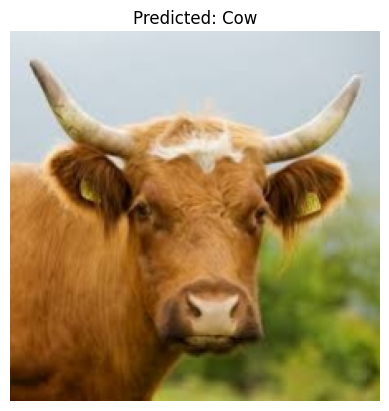

In [59]:
from tensorflow.keras.preprocessing import image
import random

# pick random image from validation folder
sample_class = random.choice(os.listdir(val_dir))
sample_img = random.choice(os.listdir(os.path.join(val_dir, sample_class)))
sample_path = os.path.join(val_dir, sample_class, sample_img)

img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

plt.imshow(image.load_img(sample_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
